## Omdena Chapter: Algeria
### Green Algeria Project Building an Intelligent Control System for greenhouses


<b> <h4> Dataset: <a href="https://www.kaggle.com/datasets/piantic/autonomous-greenhouse-challengeagc-2nd-2019">  Autonomous Greenhouse Challenge(AGC) 2019~2020 - 2nd Edition </a> </h4> </b>
<br>

Content : 
<br>
<table style="width:70%">
    <tr>
        <th style="width:30%"> File Name </th>
        <th style="width:70%"> Description </th>
    </tr>
    <tr>
        <td> Weather + Greenhouse-Climate </td>
        <td> outdoor and indoor greenhouse climate, irrigation, status of actuators,<br> requested and realized climate setpoints </td>
    </tr>
    <tr>
        <td> Resource </td>
        <td> Resource Consumption </td>
    </tr>
    <tr>
        <td> <b> Production </b> </td>
        <td> <b> Harvest </b> </td>
    </tr>
    <tr>
        <td> Crop-Production </td>
        <td> Crop-related parameters </td>
    </tr>
    <tr>
        <td> TomQuality </td>
        <td> Tomato Quality </td>
    </tr>
    <tr>
        <td> LabAnalysis </td>
        <td> Analysis of irrigation and drain samples </td>
    </tr>
    <tr>
        <td> Grodan-Sens </td>
        <td> Root-zone/slab information </td>
    </tr>
</table>


In [1]:
# This file covers the harvest analysis Greenhouse
# The weather & internal climates are covered in separate file

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = ("../Dataset")
os.listdir(path)

['AICU',
 'Automatoes',
 'Digilog',
 'Economics.pdf',
 'IUACAAS',
 'ReadMe.pdf',
 'Reference',
 'TheAutomators',
 'Weather']

In [4]:
files = ['AICU', 'Automatoes', 'Digilog', 'IUACAAS', 'Reference', 'TheAutomators']

## Production

In [5]:
df = {}
for file in files:
    df[file] = pd.read_csv("../Dataset/"+file+"/Production.csv")

In [6]:
for i in df:
    df[i].info()
    print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   %time                     24 non-null     int64  
 1   ProdA                     24 non-null     float64
 2   ProdB                     24 non-null     float64
 3   avg_nr_harvested_trusses  24 non-null     float64
 4   Truss development time    24 non-null     float64
 5   Nr_fruits_ClassA          22 non-null     float64
 6   Weight_fruits_ClassA      24 non-null     float64
 7   Nr_fruits_ClassB          24 non-null     int64  
 8   Weight_fruits_ClassB      24 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 1.8 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   %time                    

In [7]:
for i in df:
    print(i,"\n",df[i].head(),"\n")
    

AICU 
    %time  ProdA  ProdB  avg_nr_harvested_trusses  Truss development time   \
0  43875   0.12    0.0                       0.2                     45.0   
1  43880   0.50    0.0                       1.1                     48.7   
2  43885   0.58    0.0                       1.0                     48.3   
3  43889   0.27    0.0                       0.8                     50.1   
4  43894   0.73    0.0                       0.8                     50.8   

   Nr_fruits_ClassA  Weight_fruits_ClassA  Nr_fruits_ClassB  \
0               NaN                 213.0                 0   
1               NaN                1250.0                 0   
2             131.0                1224.0                 0   
3             128.0                1187.0                 0   
4             143.0                1328.0                 0   

   Weight_fruits_ClassB  
0                     0  
1                     0  
2                     0  
3                     0  
4                    

In [9]:
for i in df:
    df[i]['%time'] = pd.to_datetime(df[i]['%time'], unit='d',origin='1899-12-30')


In [10]:
col = df['AICU'].columns
col = col[1:]

In [11]:
for i in df:
    print(df[i].isnull().sum())
    print("")

%time                       0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    0
Truss development time      0
Nr_fruits_ClassA            2
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

%time                       0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    0
Truss development time      0
Nr_fruits_ClassA            1
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

%time                       0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    0
Truss development time      0
Nr_fruits_ClassA            0
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

%time                       0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    1
Truss development time      

In [12]:
#as the given data is in time-series format therefor interpolating the data with nearest member to remove null values

for i in df:
    for j in col:
        df[i][j] = df[i][j].astype(str).astype(float)

for i in df:
    df[i] = df[i].fillna(df[i].mean())  
  

C:\Users\vivek\AppData\Local\Temp\ipykernel_25364\2623652833.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[i] = df[i].fillna(df[i].mean())


In [13]:
for i in df:
    df[i].info()
    print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   %time                     24 non-null     datetime64[ns]
 1   ProdA                     24 non-null     float64       
 2   ProdB                     24 non-null     float64       
 3   avg_nr_harvested_trusses  24 non-null     float64       
 4   Truss development time    24 non-null     float64       
 5   Nr_fruits_ClassA          24 non-null     float64       
 6   Weight_fruits_ClassA      24 non-null     float64       
 7   Nr_fruits_ClassB          24 non-null     float64       
 8   Weight_fruits_ClassB      24 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.8 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  

In [14]:
for i in df:
    print(i,"\n",df[i].head(),"\n")

AICU 
        %time  ProdA  ProdB  avg_nr_harvested_trusses  Truss development time   \
0 2020-02-14   0.12    0.0                       0.2                     45.0   
1 2020-02-19   0.50    0.0                       1.1                     48.7   
2 2020-02-24   0.58    0.0                       1.0                     48.3   
3 2020-02-28   0.27    0.0                       0.8                     50.1   
4 2020-03-04   0.73    0.0                       0.8                     50.8   

   Nr_fruits_ClassA  Weight_fruits_ClassA  Nr_fruits_ClassB  \
0        126.318182                 213.0               0.0   
1        126.318182                1250.0               0.0   
2        131.000000                1224.0               0.0   
3        128.000000                1187.0               0.0   
4        143.000000                1328.0               0.0   

   Weight_fruits_ClassB  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0

In [15]:
for i in df:
    print(i,"\n",df[i].describe(),"\n")

AICU 
            ProdA      ProdB  avg_nr_harvested_trusses  \
count  24.000000  24.000000                 24.000000   
mean    0.569167   0.004167                  0.904167   
std     0.226733   0.020412                  0.327678   
min     0.120000   0.000000                  0.200000   
25%     0.455000   0.000000                  0.750000   
50%     0.590000   0.000000                  0.900000   
75%     0.712500   0.000000                  1.100000   
max     1.110000   0.100000                  1.500000   

       Truss development time   Nr_fruits_ClassA  Weight_fruits_ClassA  \
count                24.000000         24.000000             24.000000   
mean                 47.733333        126.318182           1358.862500   
std                   3.420865         37.927146            566.070561   
min                  40.300000         33.000000            213.000000   
25%                  46.050000        122.000000           1107.250000   
50%                  48.450000     

C:\Users\vivek\AppData\Local\Temp\ipykernel_25364\1218934350.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG")


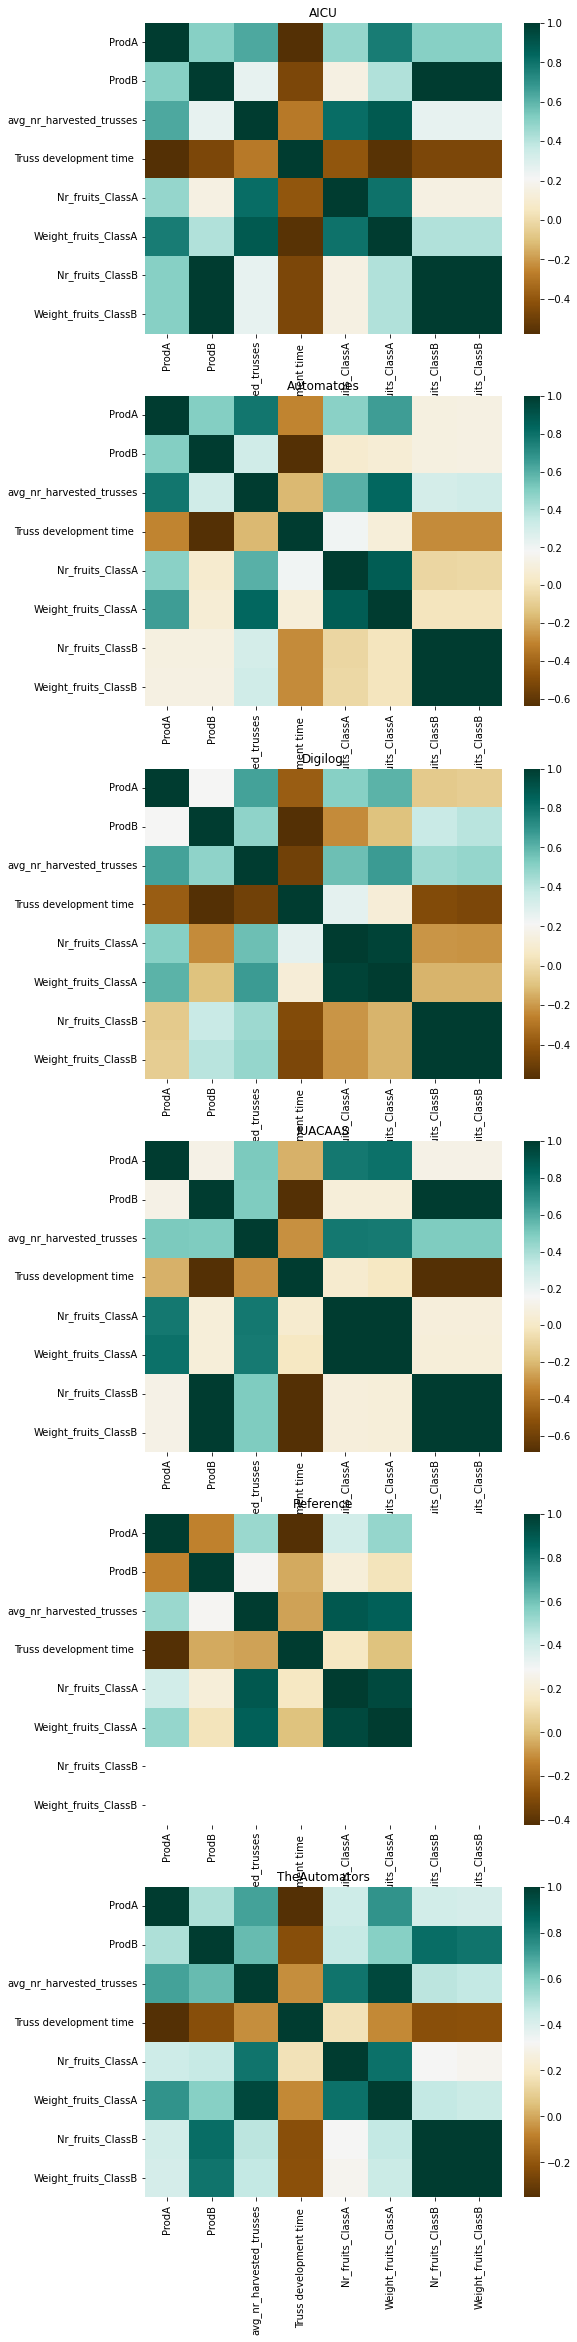

In [16]:
from pandas.plotting import scatter_matrix
k=0
plt.figure(figsize=(8,40))
for i in df:
    df_corr = df[i].corr()
    plt.subplot(6, 1, k + 1)
    g = sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG")
    plt.title(i)
    k=k+1
plt.show()

<Figure size 432x432 with 0 Axes>

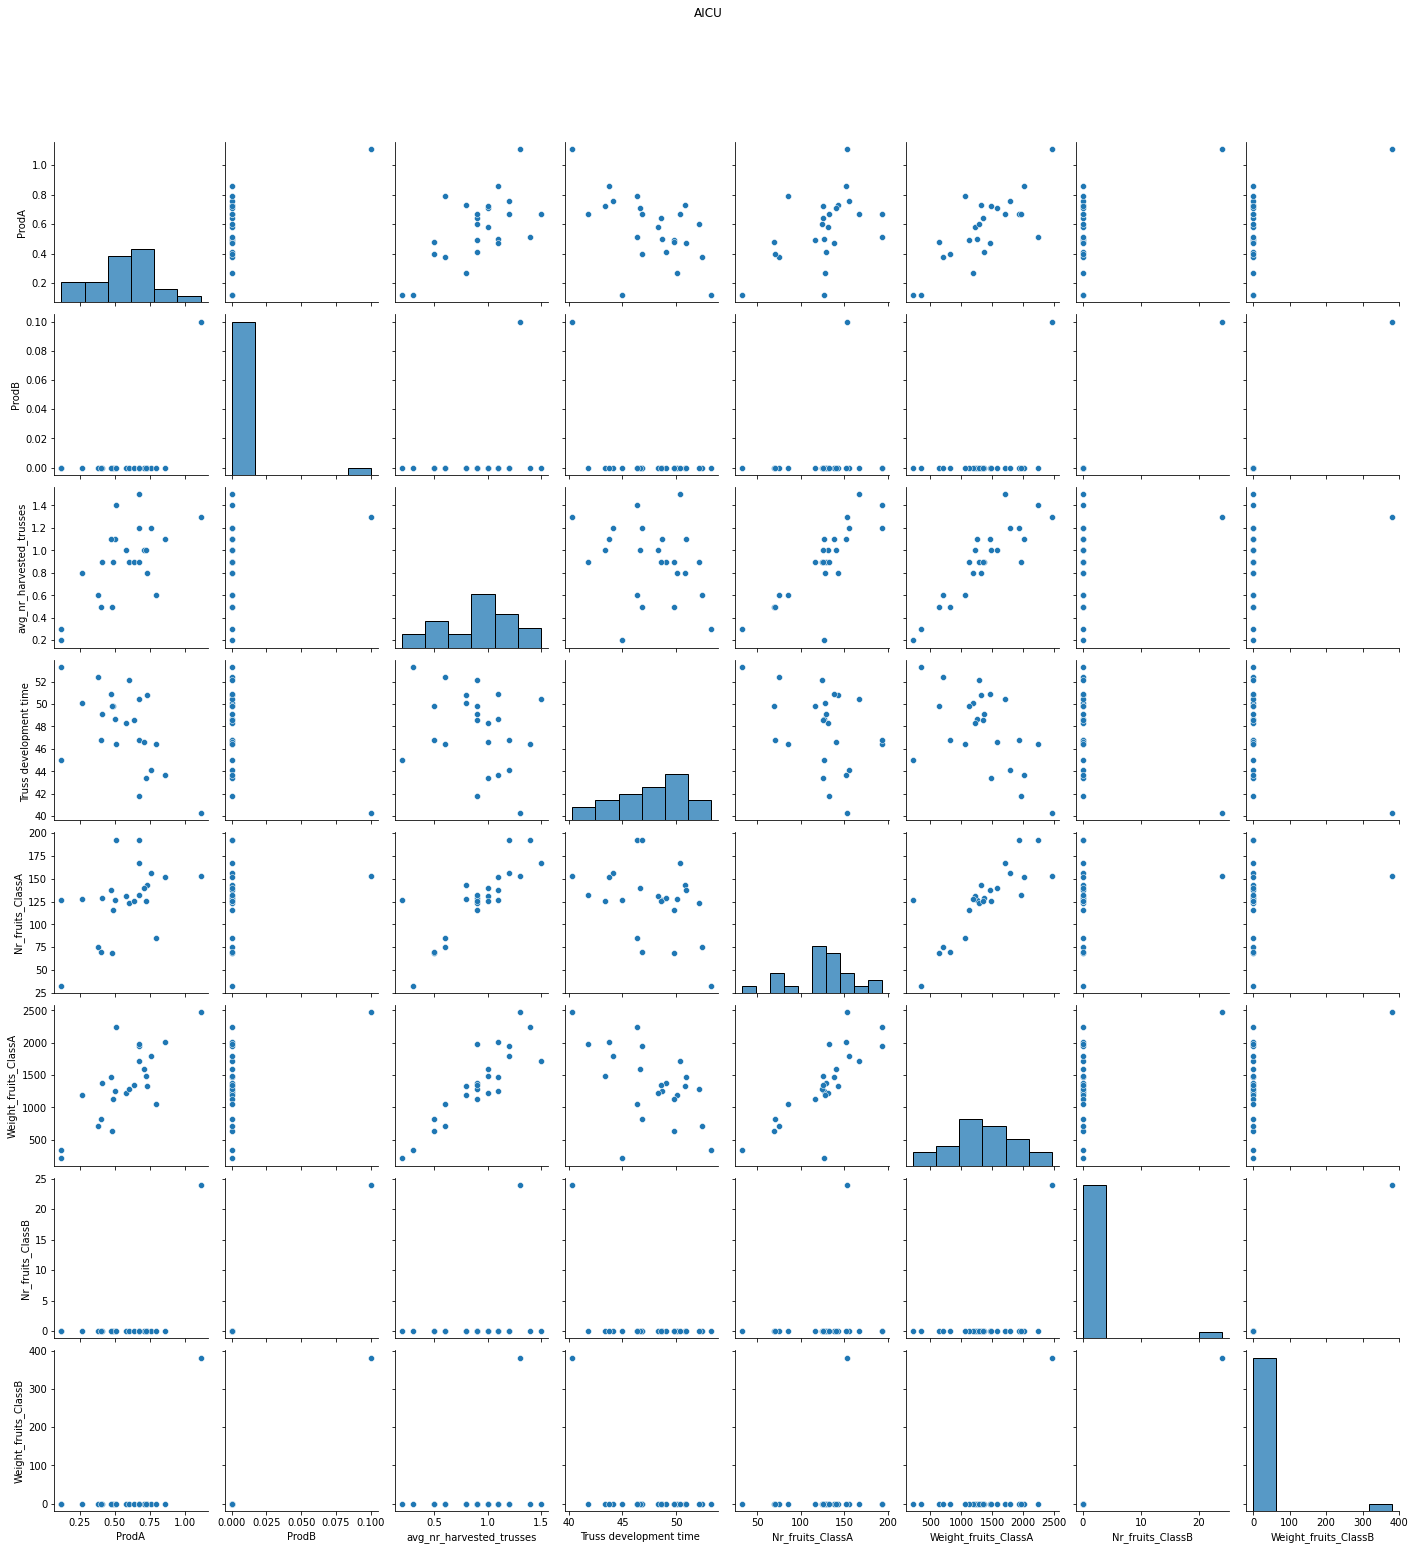

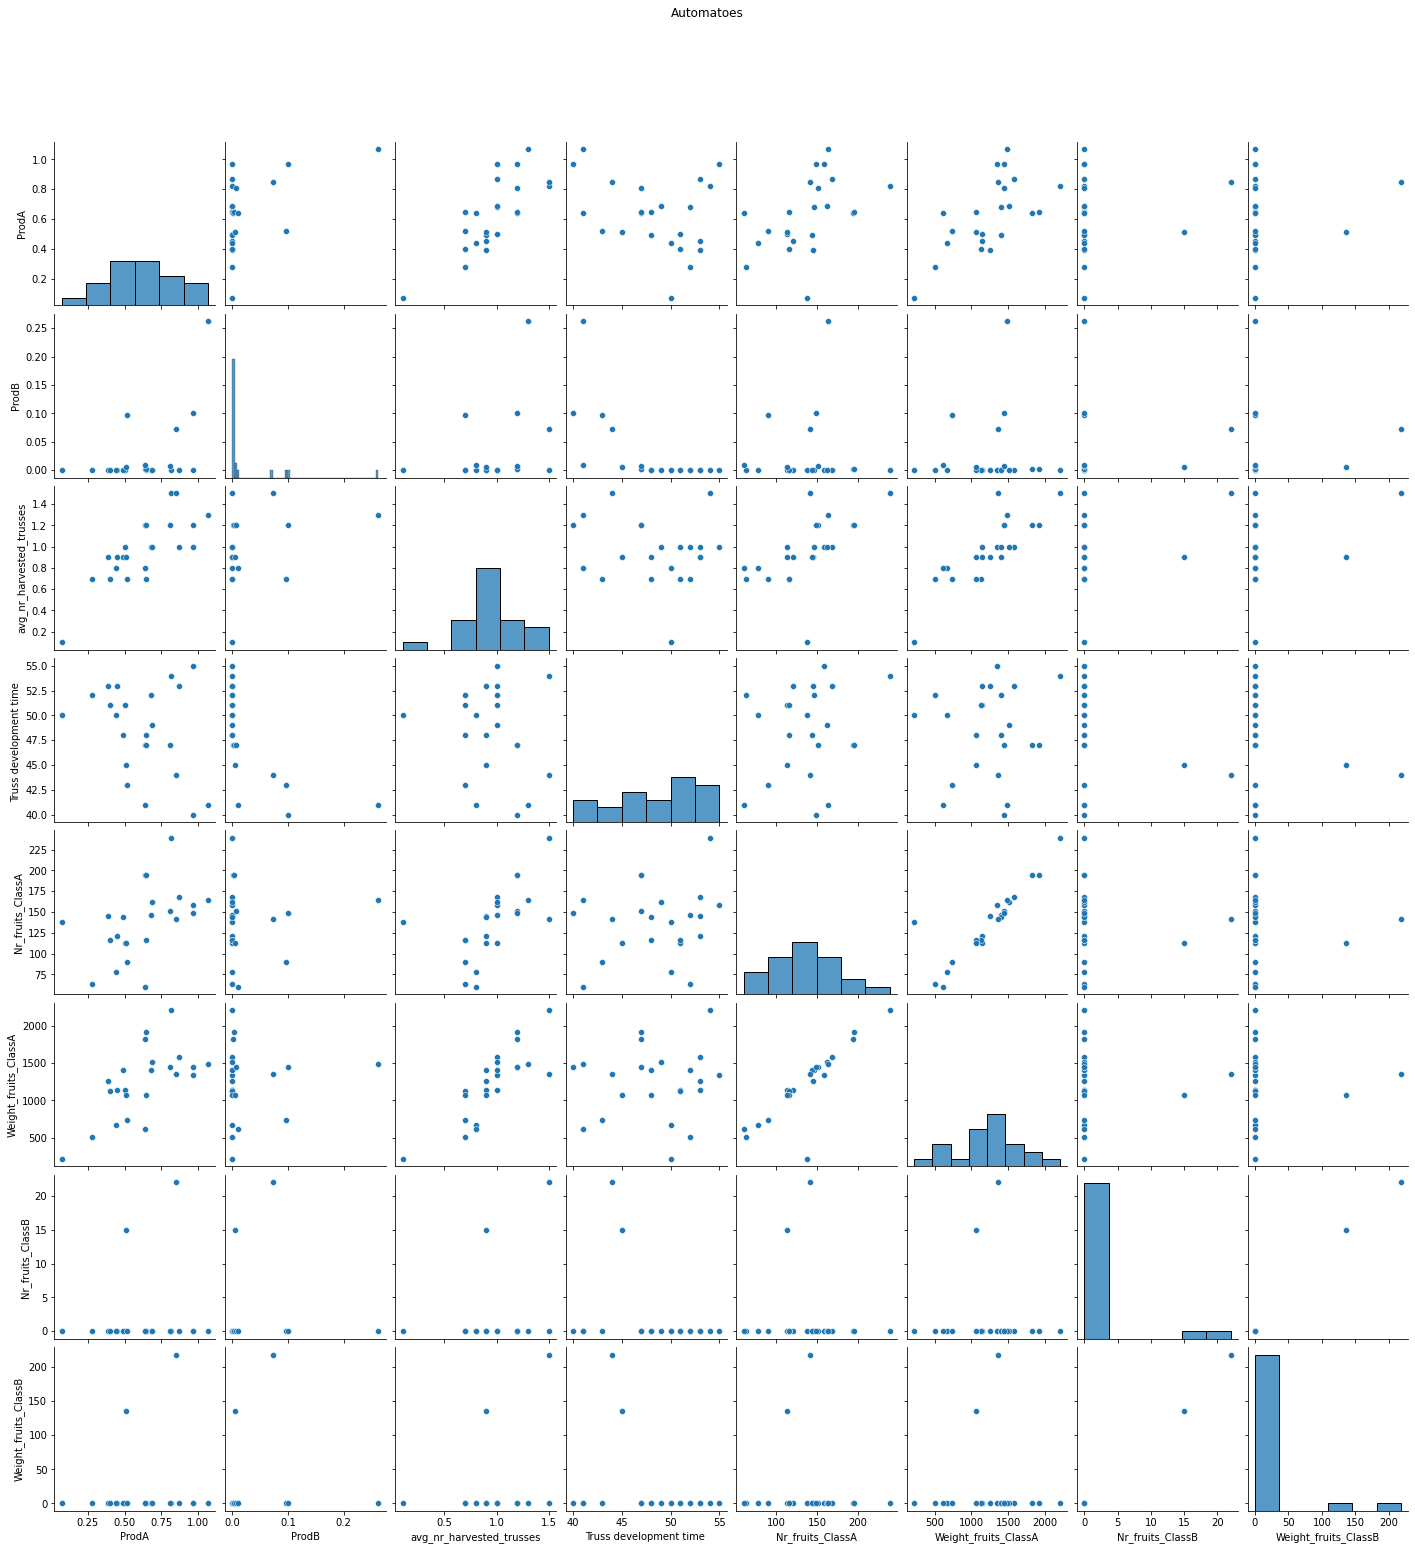

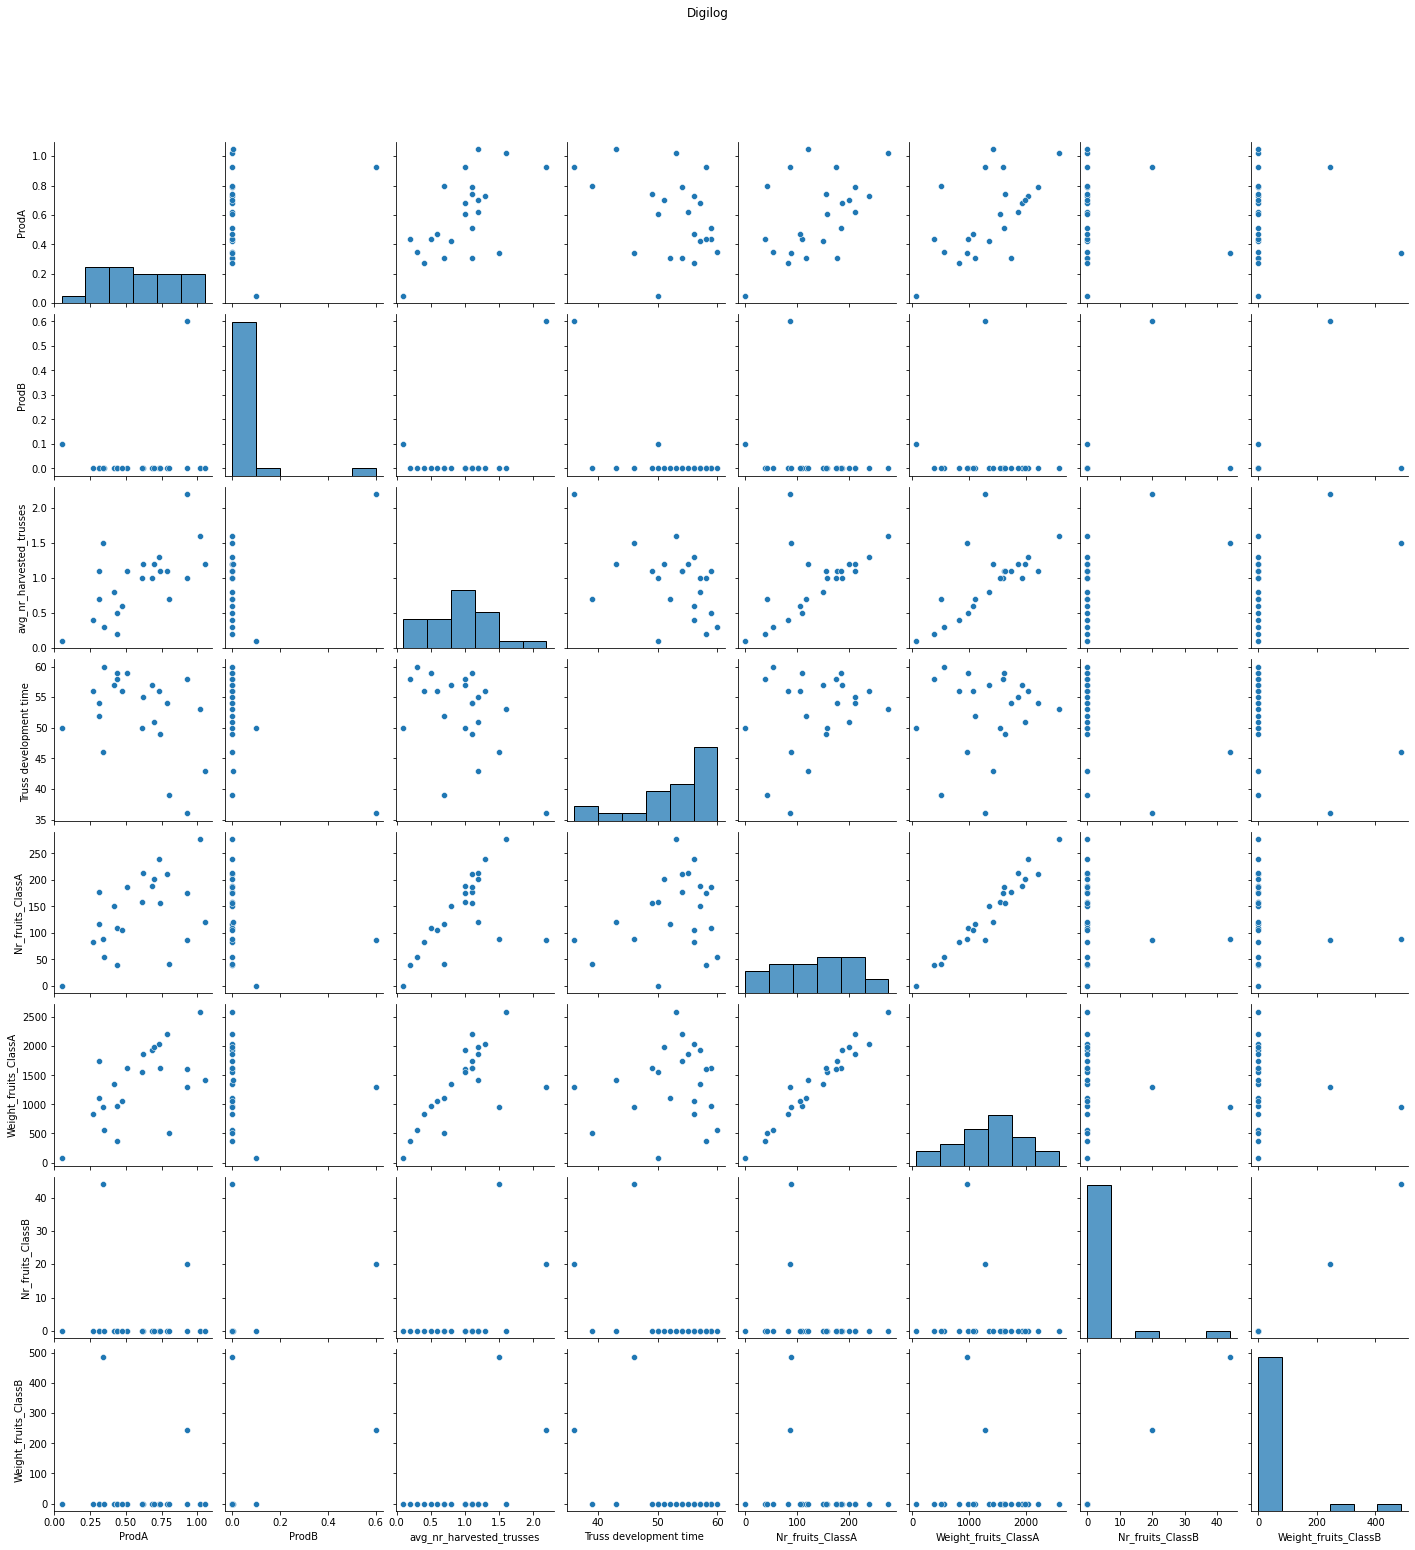

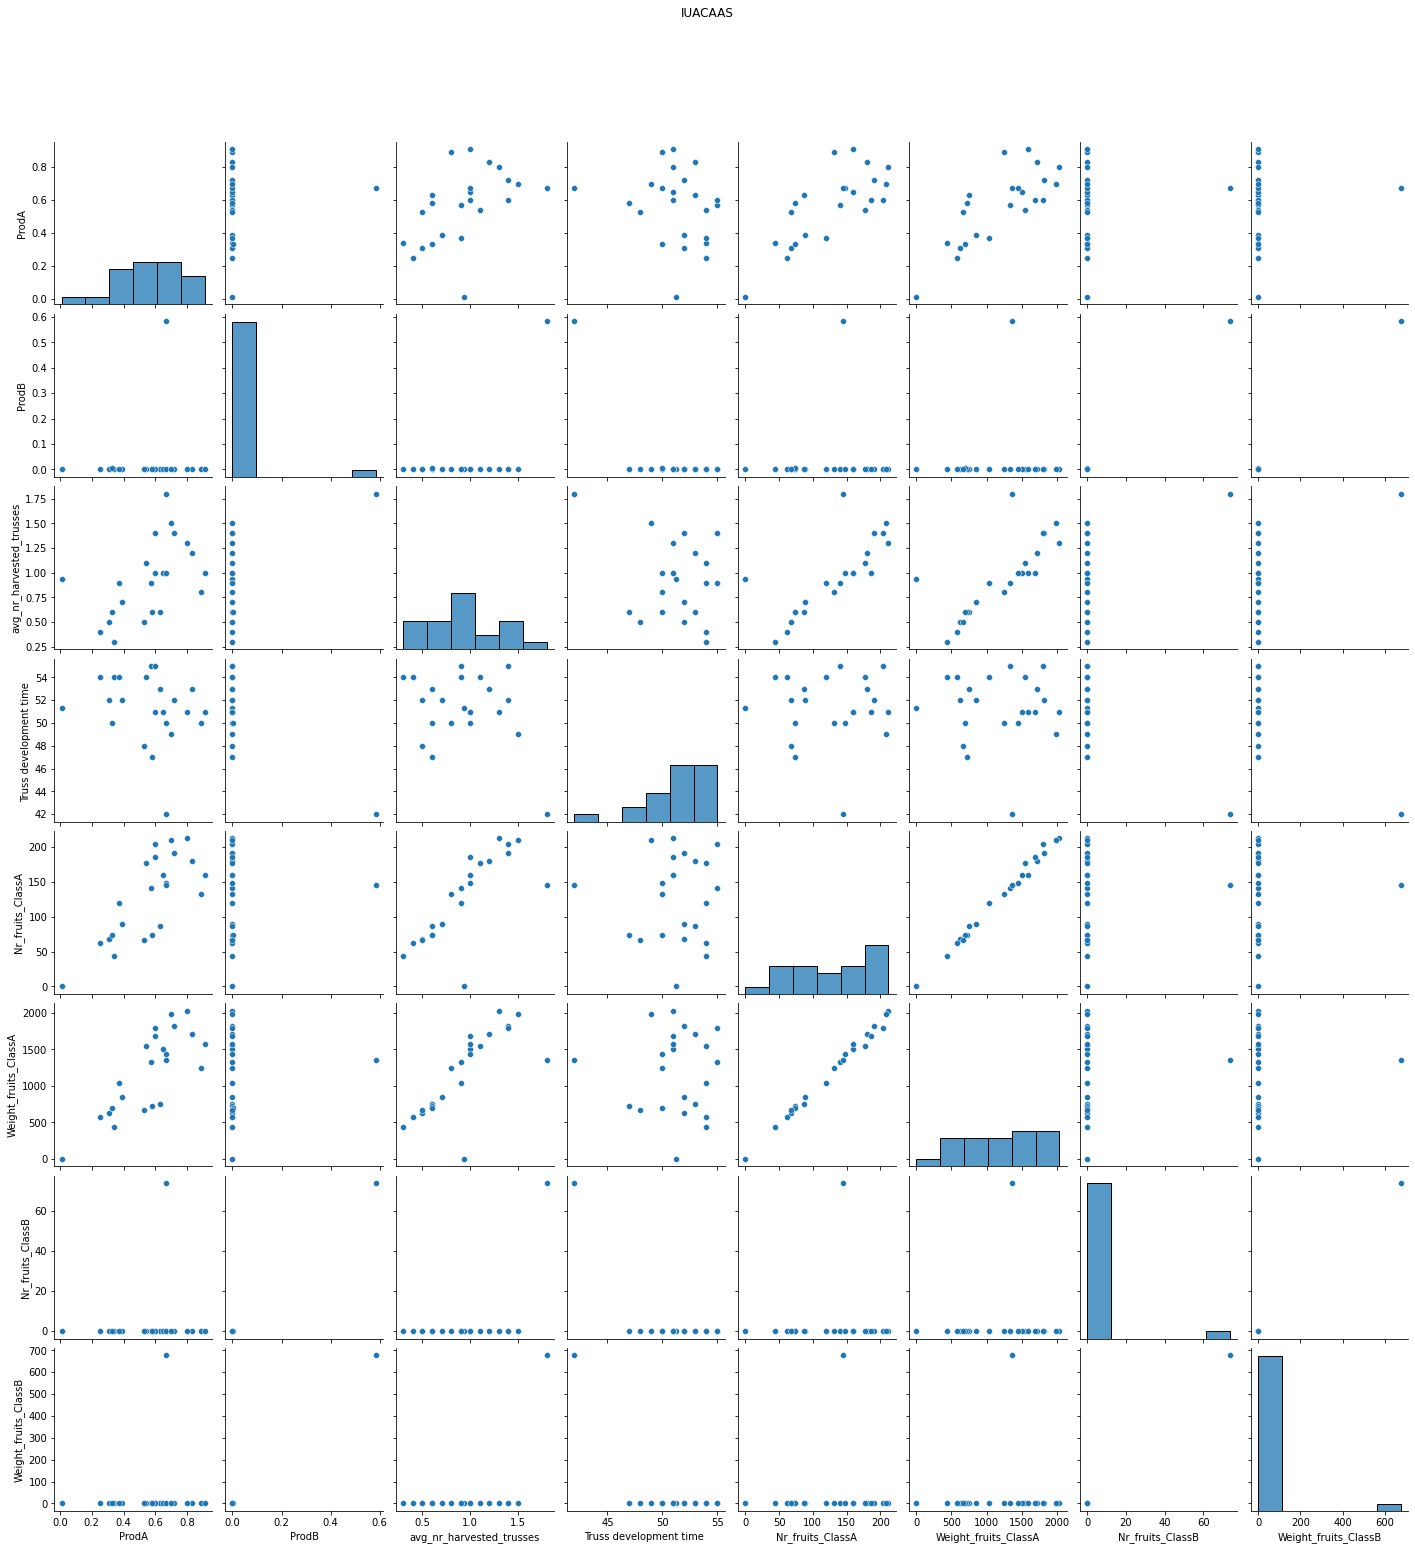

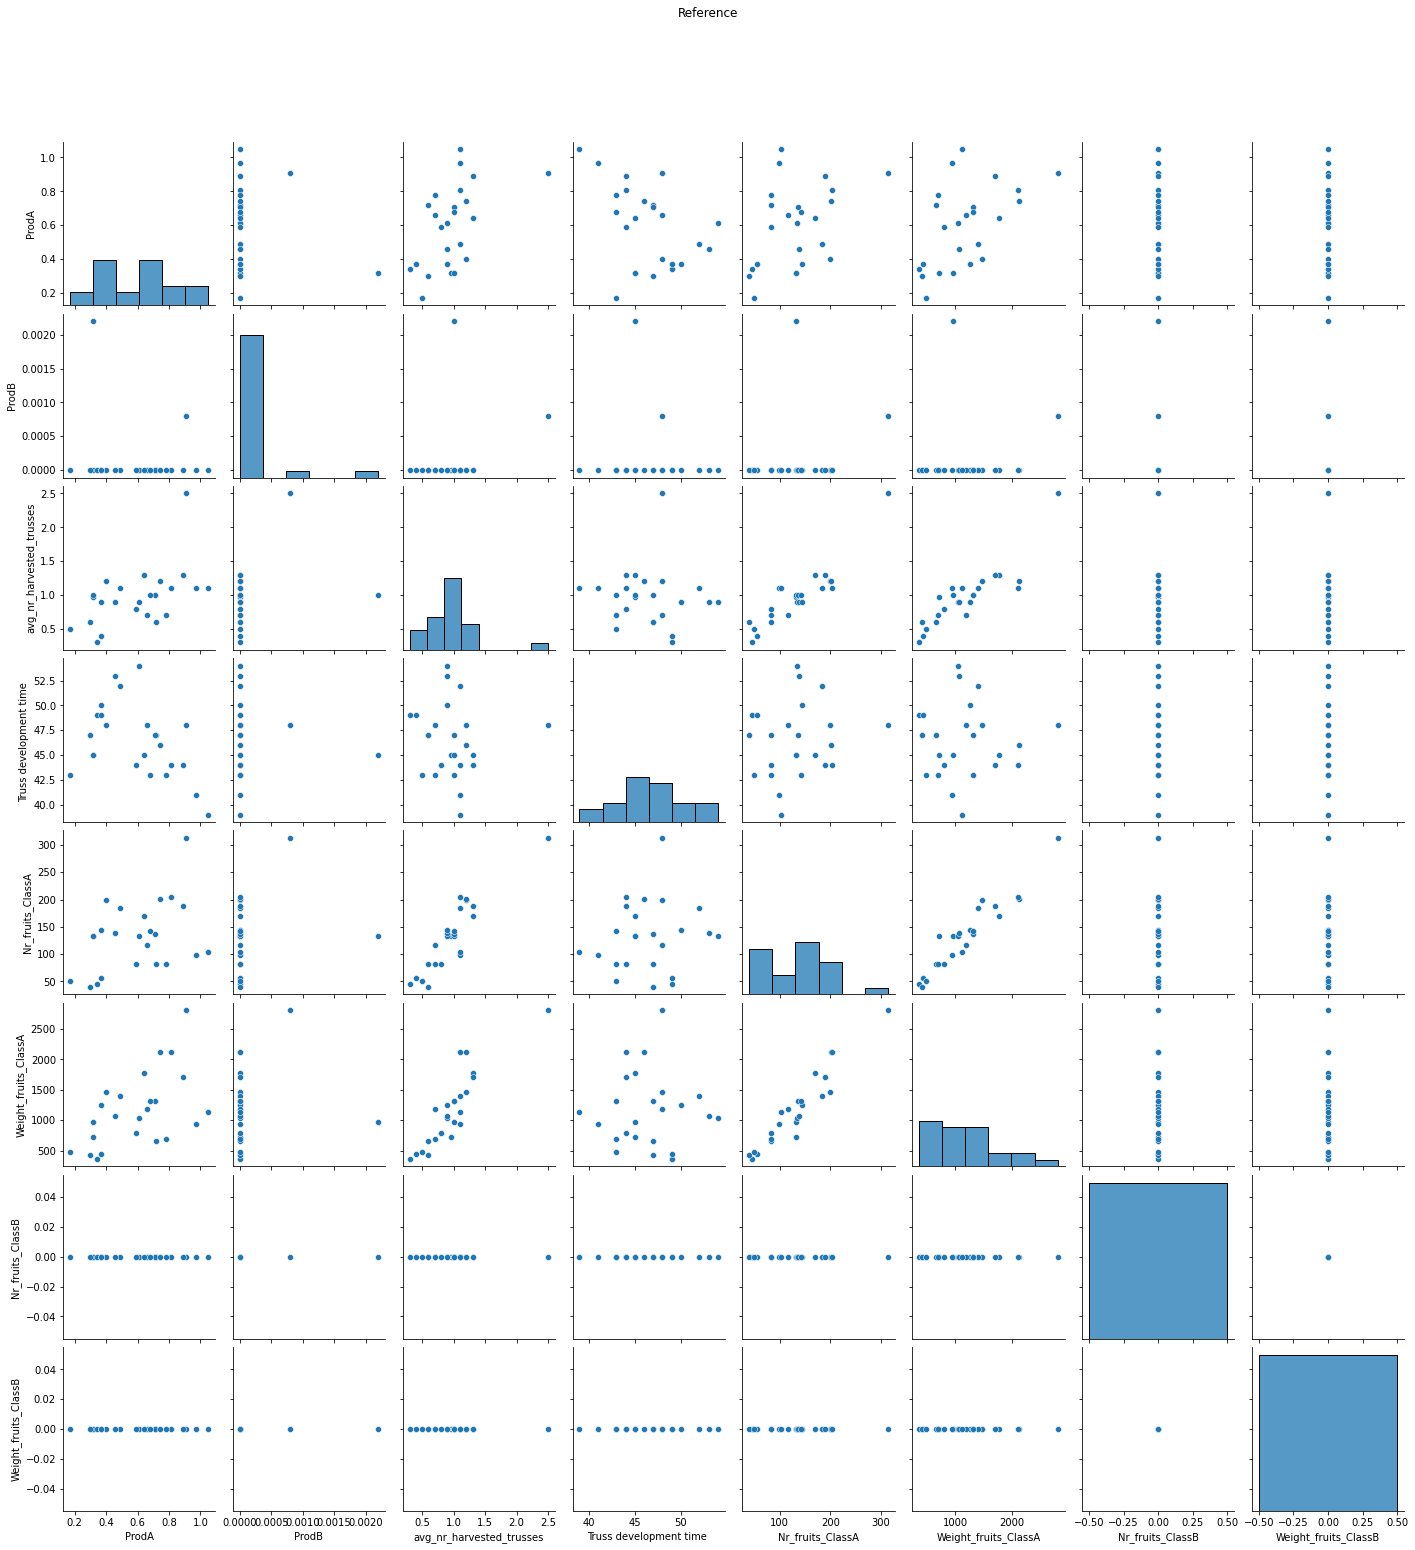

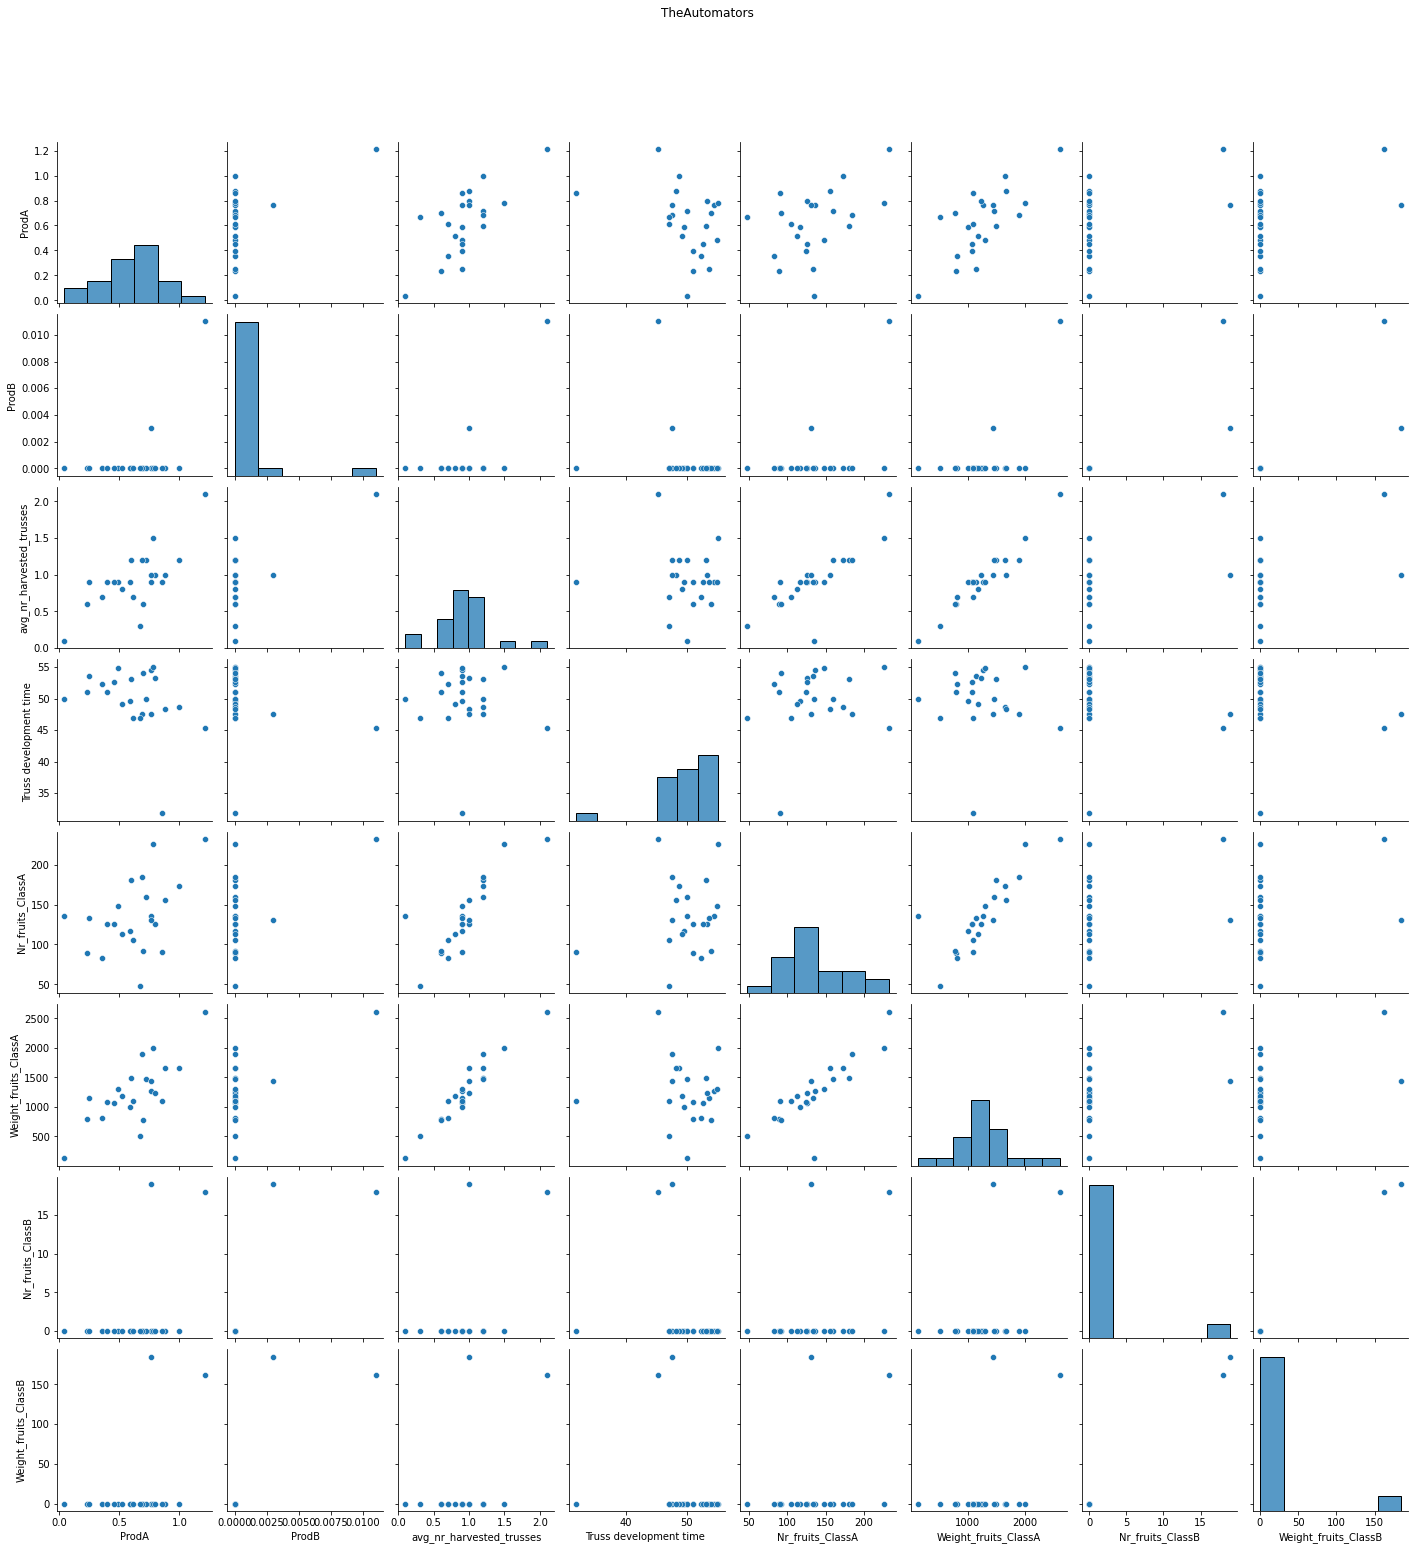

In [17]:
plt.figure(figsize=(6,6))
for j in df:
    g = sns.pairplot(df[j])
    g.fig.suptitle("{}".format(j), y=1.08) # y= some height>1

plt.show()

<Figure size 720x432 with 0 Axes>

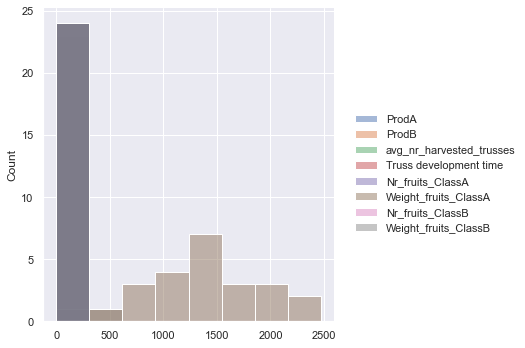

<Figure size 720x432 with 0 Axes>

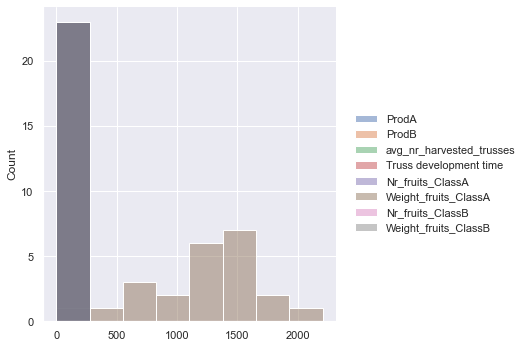

<Figure size 720x432 with 0 Axes>

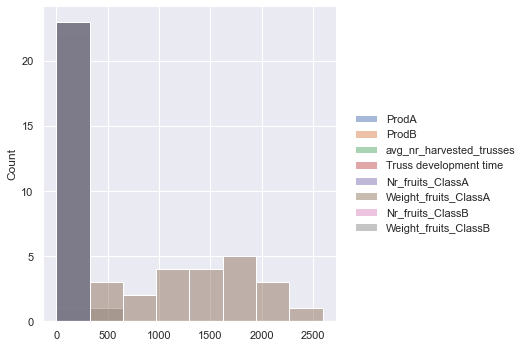

<Figure size 720x432 with 0 Axes>

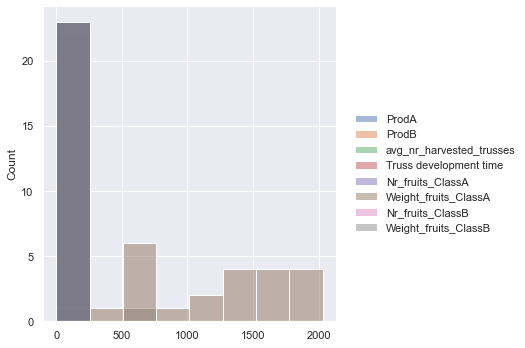

<Figure size 720x432 with 0 Axes>

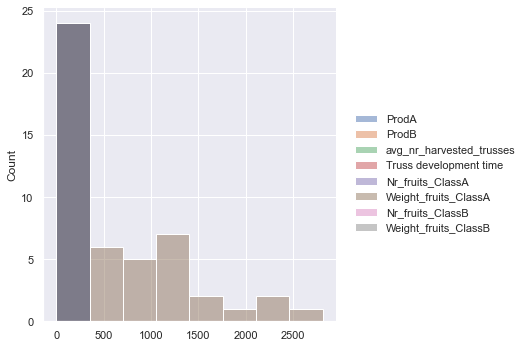

<Figure size 720x432 with 0 Axes>

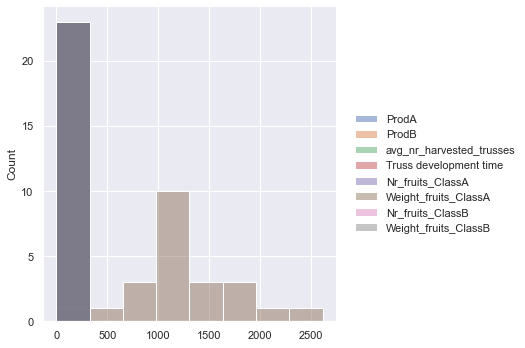

In [22]:
for i in df:
    plt.figure(figsize=(10,6))
    sns.displot(df[i],bins=8)

In [19]:
def plot(target):
    
    k=0
    sns.set()
    plt.figure(figsize=(20, 80),facecolor='lightgray')

    for j in col:
        plt.subplot(9, 1, k + 1)
        for i in df:
            plt.plot(df[i][target], df[i][j])
        plt.legend(files)
        plt.title("{var} vs {target}".format(var=j,target=target))
        plt.xlabel(j)
        plt.ylabel(target)
        k=k+1
    plt.show()
        
    

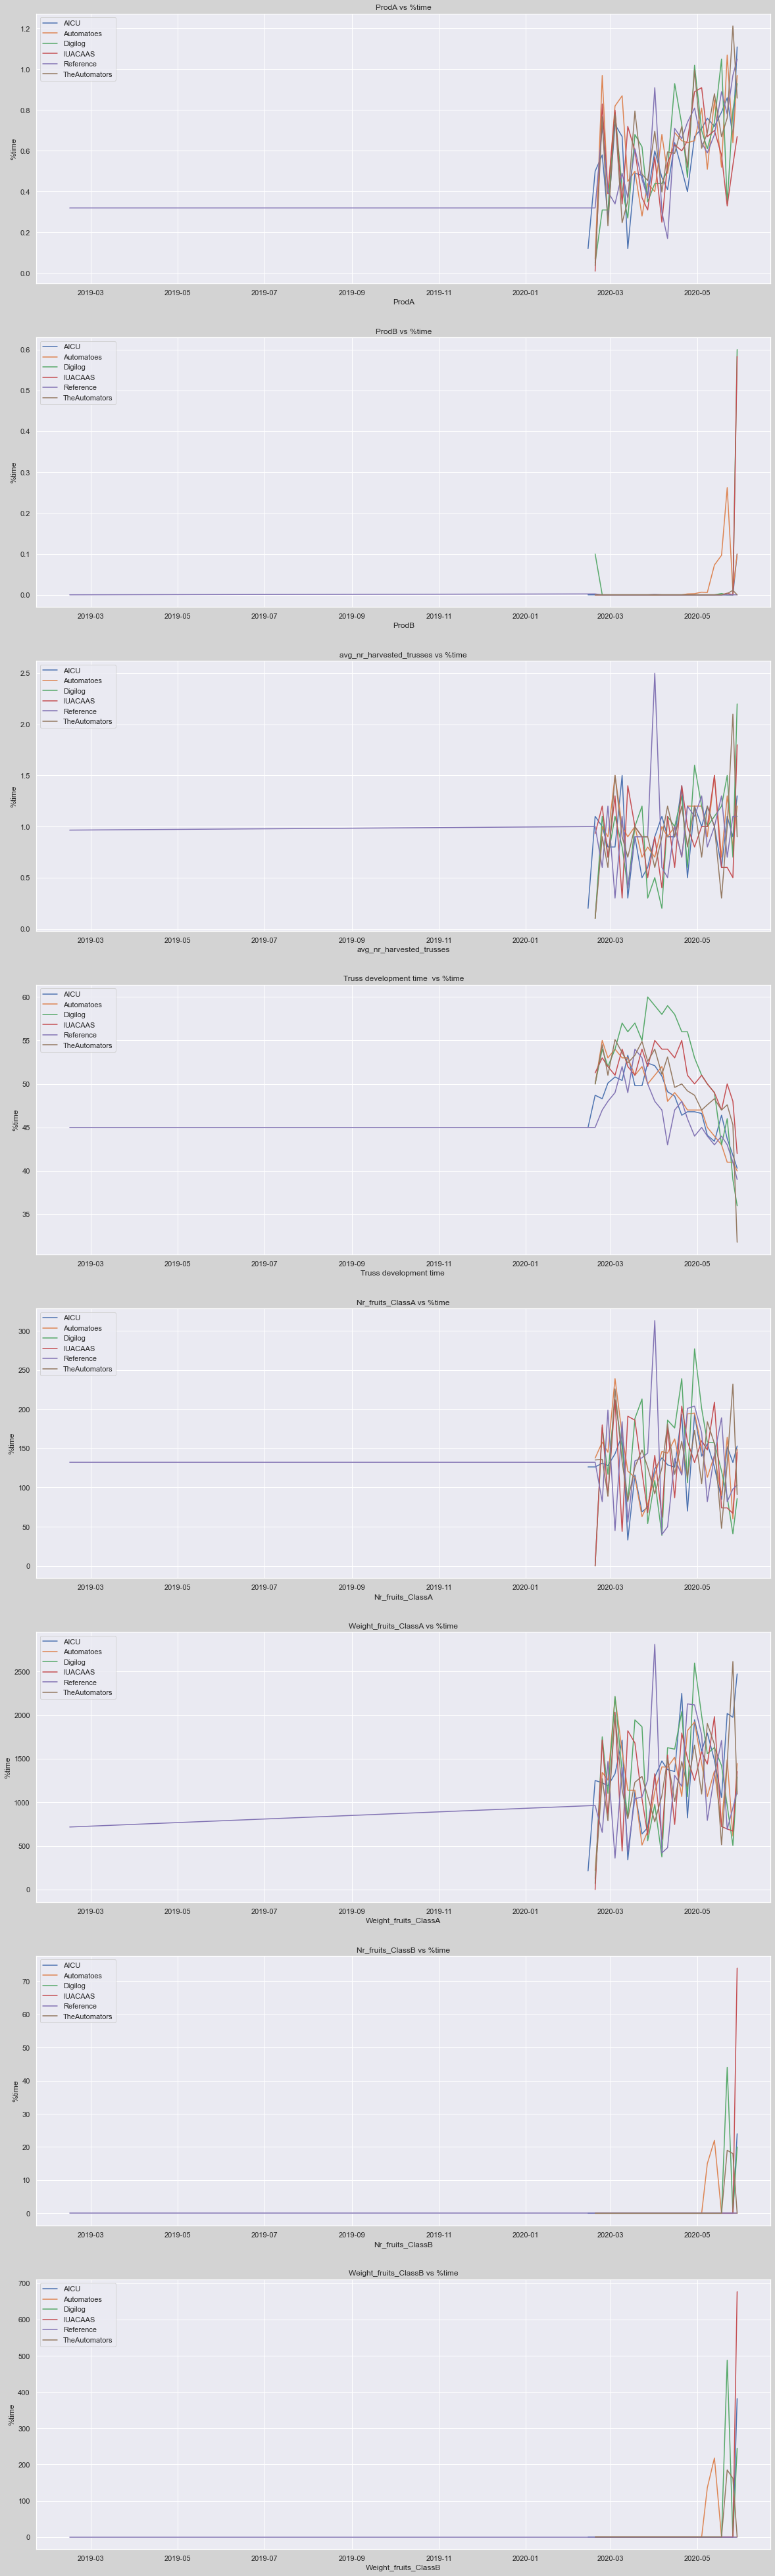

In [20]:
plot("%time")

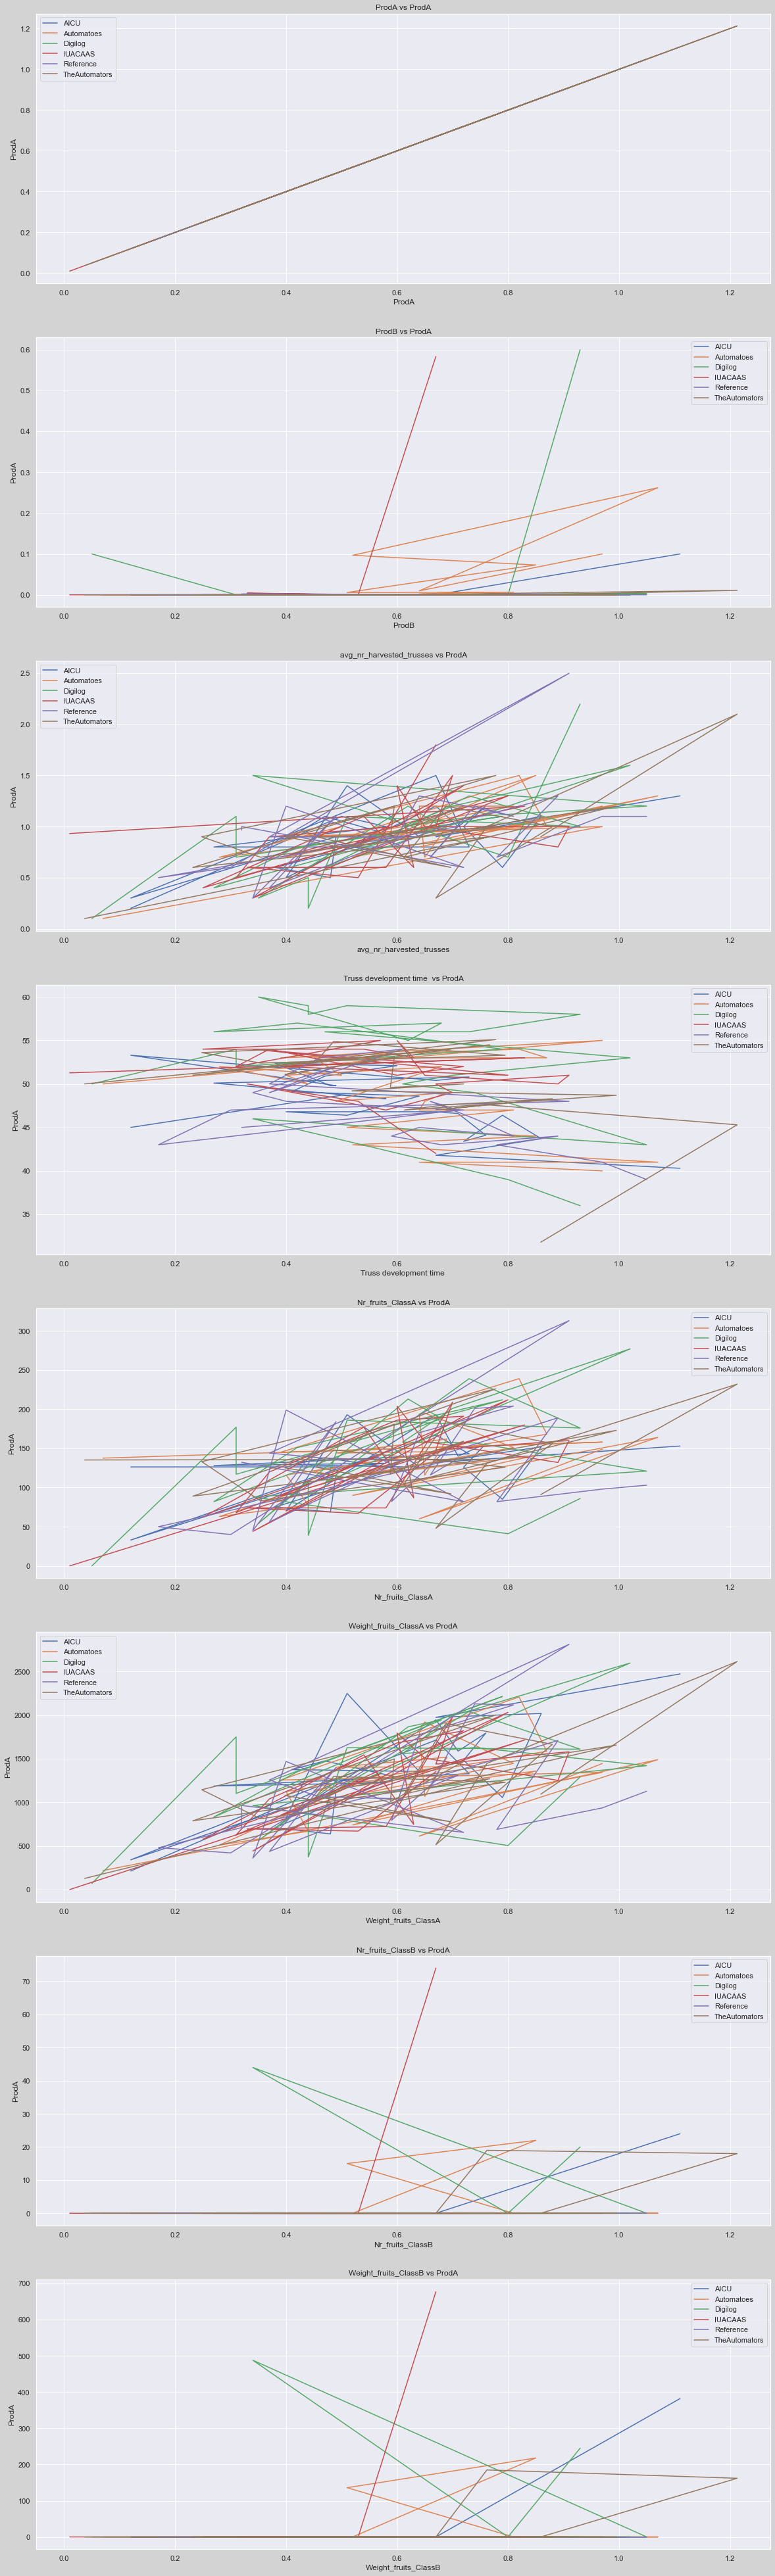

In [21]:
plot("ProdA")